In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')
sns.set(font_scale=1.3)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### ****Loading and Understanding the Data****

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### ****Getting Information from the Data****

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### **Checking Null Values**

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### **Checking Duplicates and Removing**

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

# **Exploratory Data Analysis**

### **Percentage of Heart Attack Chances**

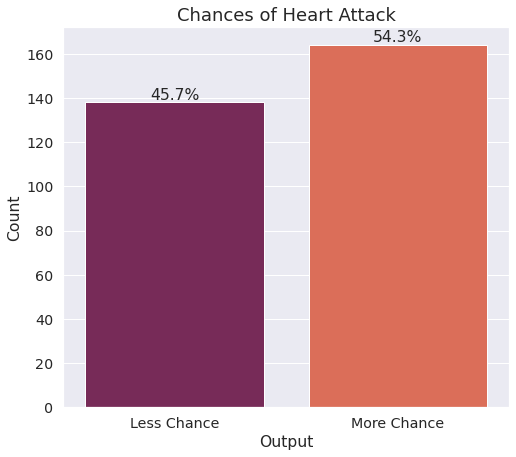

In [8]:
plt.figure(figsize=(8,7))

my_ticks = ['Less Chance', 'More Chance']

ax = sns.countplot(x='output', data=df, palette='rocket')
ax.set_xticklabels(my_ticks)
plt.xlabel('Output')
plt.ylabel('Count')
plt.title('Chances of Heart Attack', fontsize=18)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height*100/302,2)}%', (x + width/2, y + height*1.01), ha='center')

plt.show()

As we can see above that there are 54.3% of dataset which has high chance of Heart Attack where 45.7% are with Low Chance.

### **Gender Distribution in DataSet**

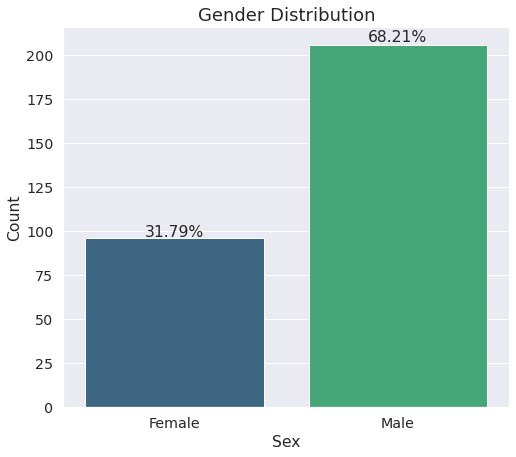

In [9]:
plt.figure(figsize=(8,7))

my_ticks = ['Female', 'Male']

ax = sns.countplot(x='sex', data=df, palette='viridis')
ax.set_xticklabels(my_ticks)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender Distribution', fontsize=18)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height*100/302,2)}%', (x + width/2, y + height*1.01), ha='center')

plt.show()

We have 68.21% Male and 31.79% Female in our DataSet. (Assuming, 1=Male and 0=Female)

### **Gender Distribution wrt Heart Attack**

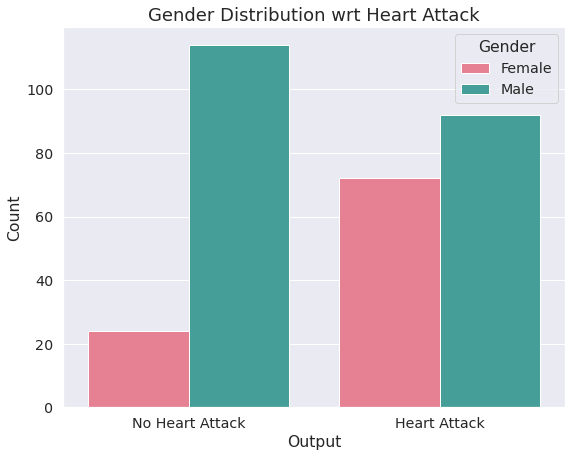

In [10]:
plt.figure(figsize=(9,7))

my_ticks = ['No Heart Attack', 'Heart Attack']
my_legends = ['Female', 'Male']

sns.set(font_scale=1.3)
ax = sns.countplot(x = 'output', hue='sex', data=df, palette='husl')
ax.set_xticklabels(my_ticks)

plt.xlabel('Output')
plt.ylabel('Count')
plt.legend(title = 'Gender', labels = my_legends)
plt.title('Gender Distribution wrt Heart Attack', fontsize=18)


plt.show()

### **Age Distribution in our DataSet**

<Figure size 576x504 with 0 Axes>

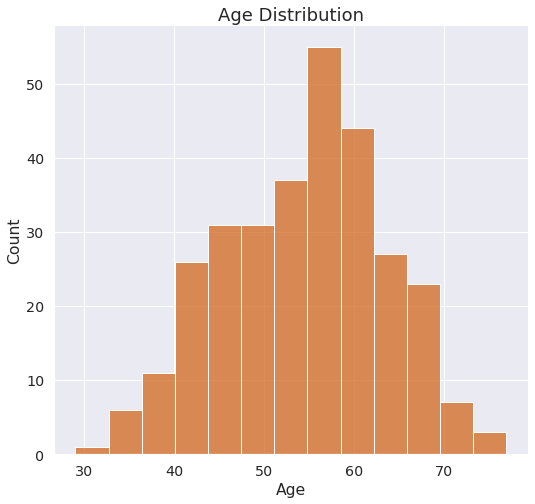

In [11]:
plt.figure(figsize=(8,7))

sns.set_theme()
sns.set(font_scale=1.3)
sns.displot(x='age', data=df, color='Chocolate', height=7, aspect=1.1)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution', fontsize=18)

plt.show()

As we can see our maximum dataset ranges of age between 50 - 60.

### **Plotting No of People vs Age with Low or High Risk of Heart Attack**

In [12]:
v = pd.crosstab(df["age"],df["output"]).reset_index()
v.columns = ['Age', 'Low Risk', 'High Risk']

v.head()

,Age,Low Risk,High Risk
0,29,0,1
1,34,0,2
2,35,2,2
3,37,0,2
4,38,1,1


Text(0.5, 1.0, 'Low Risk vs High Risk wrt Age')

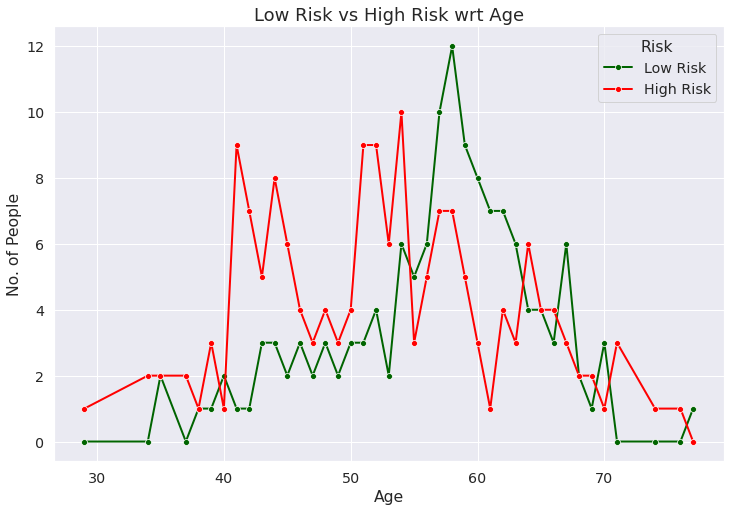

In [13]:
plt.figure(figsize=(12,8))

sns.lineplot(x = 'Age', y='Low Risk', data=v, 
             marker = 'o' ,color = 'darkgreen', lw=2)
sns.lineplot(x = 'Age', y='High Risk', data=v, 
             marker = 'o', color = 'red', lw=2)

plt.legend(title = 'Risk', labels = ['Low Risk', 'High Risk'])
plt.xlabel('Age')
plt.ylabel('No. of People')
plt.title('Low Risk vs High Risk wrt Age', fontsize=18)

- Here we can see there is no significant relation of Age with Heart Attack Risk.
- One point can be seen here is that there are more number of people between age 55-60 who has Low Risk of Heart Attack.

## **CATEGORICAL FEATURES**

### **CountPlot of Categorical Features**

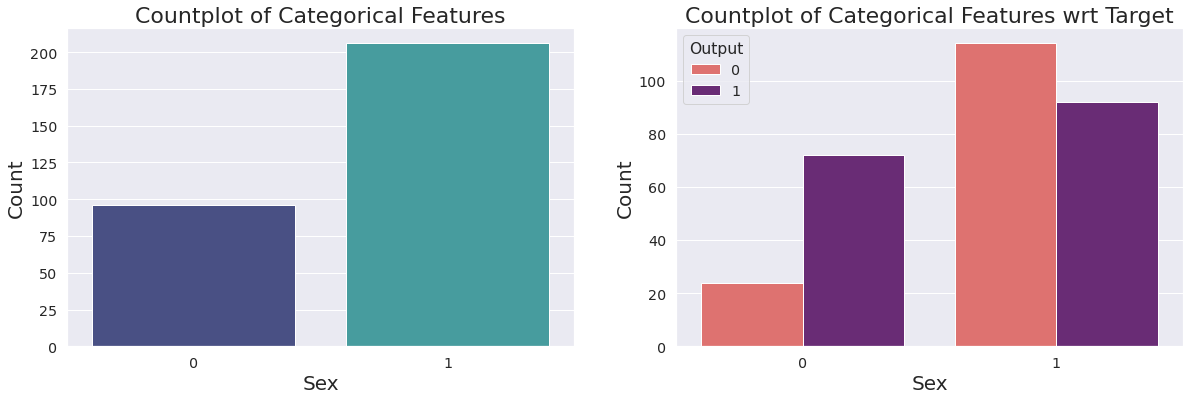

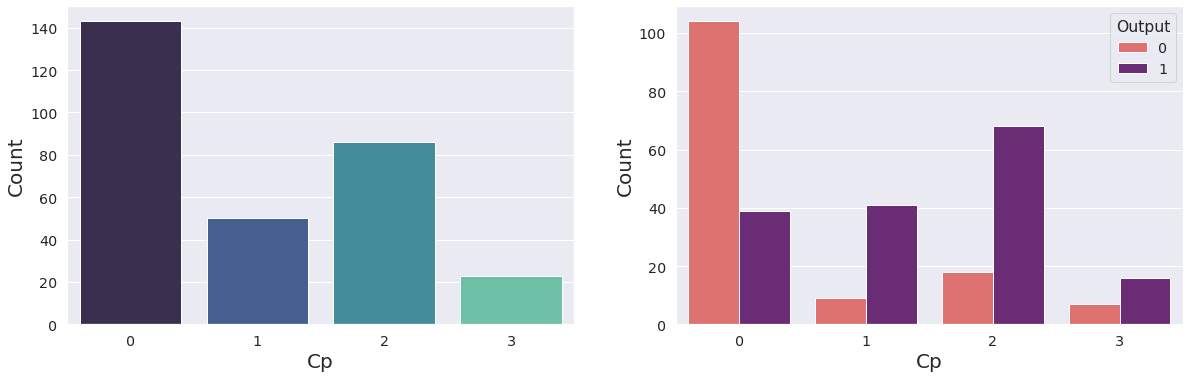

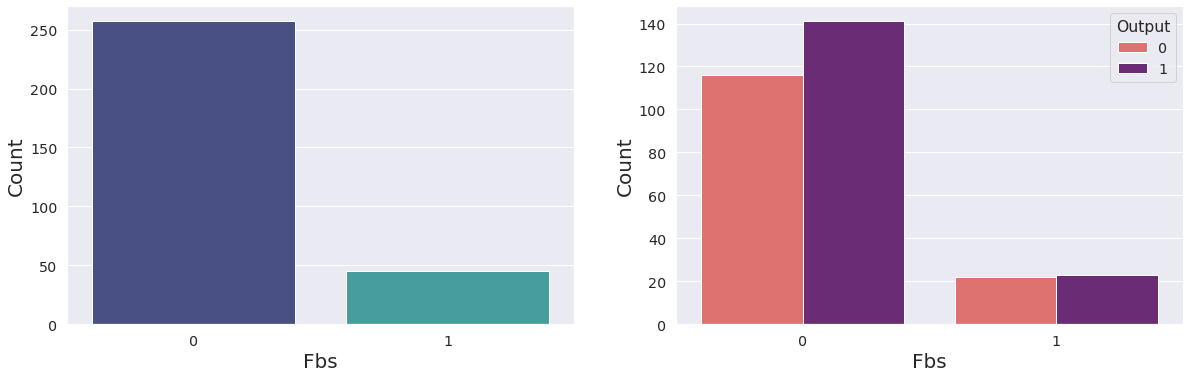

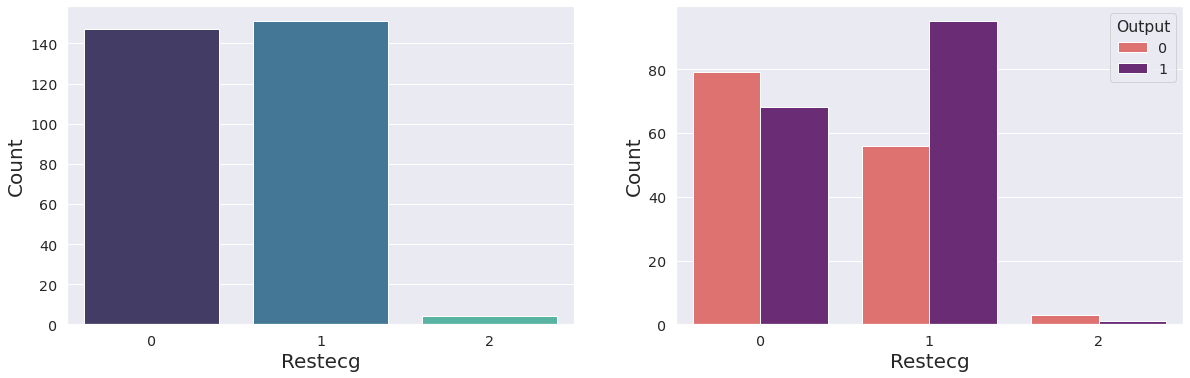

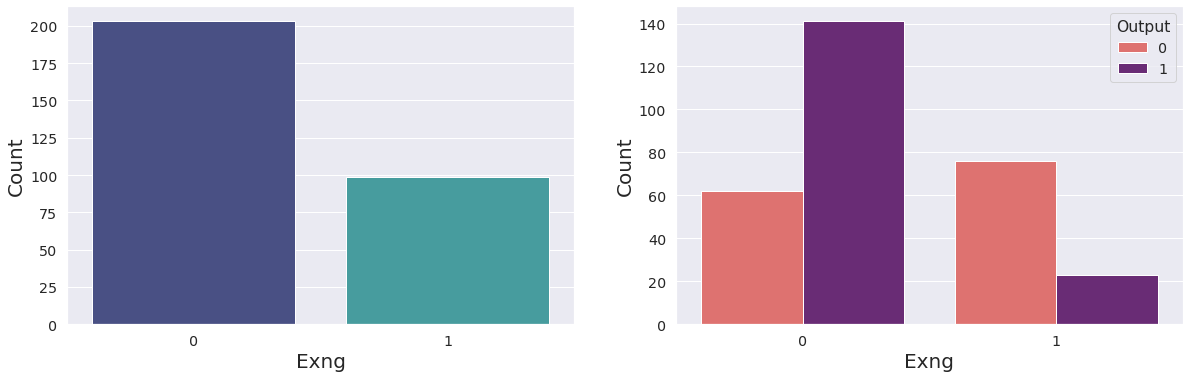

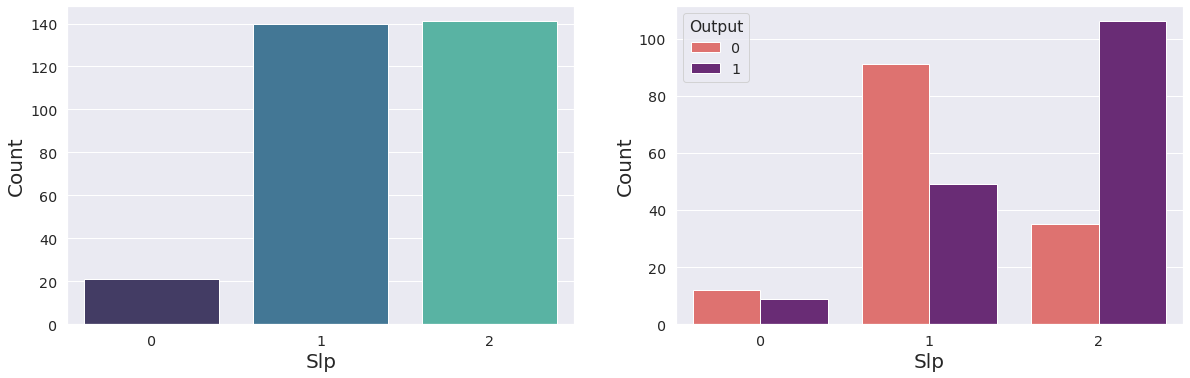

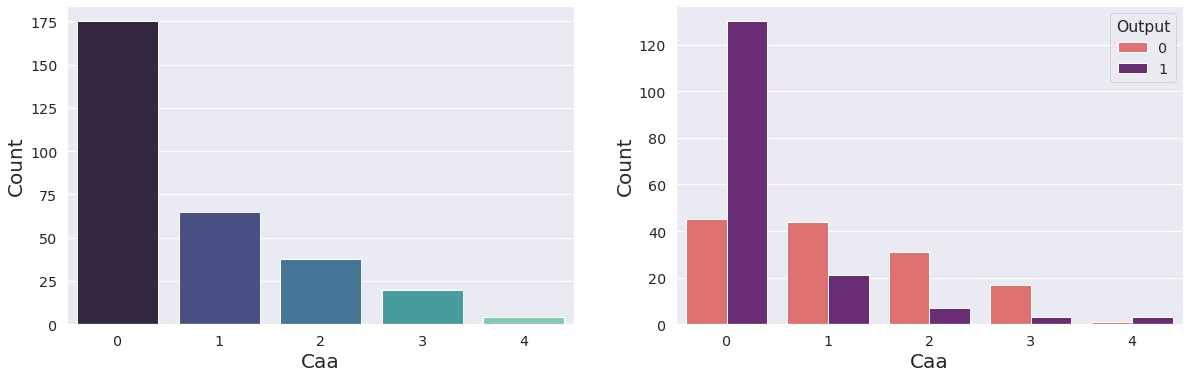

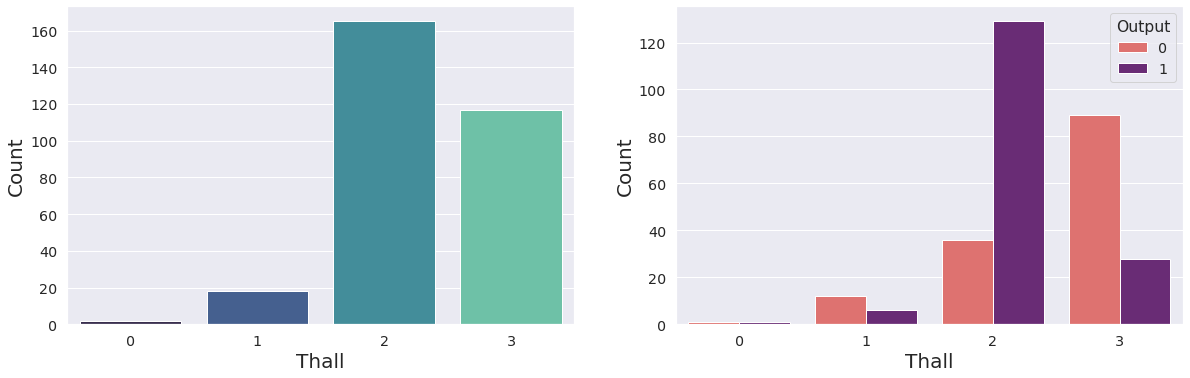

In [14]:
cat = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']



for i in range(len(cat)):
    
    plt.figure(figsize=(20,55))
    
    plt.subplot(len(cat),2,1)
    sns.countplot(x=cat[i] , data=df, palette='mako')
    plt.xlabel(cat[i].capitalize(), fontsize=20)
    plt.ylabel('Count', fontsize=20)
    if i == 0:
        plt.title('Countplot of Categorical Features', fontsize=22)
    
    plt.subplot(len(cat),2,2)
    sns.countplot(x=cat[i], hue='output', data = df, palette='magma_r')
    plt.xlabel(cat[i].capitalize(), fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.legend(title = 'Output')
    if i == 0:
        plt.title('Countplot of Categorical Features wrt Target', fontsize=22)
    
    plt.show()

## **CONTINUOUS FEATURES**

### **Histplot of Continuous Features**

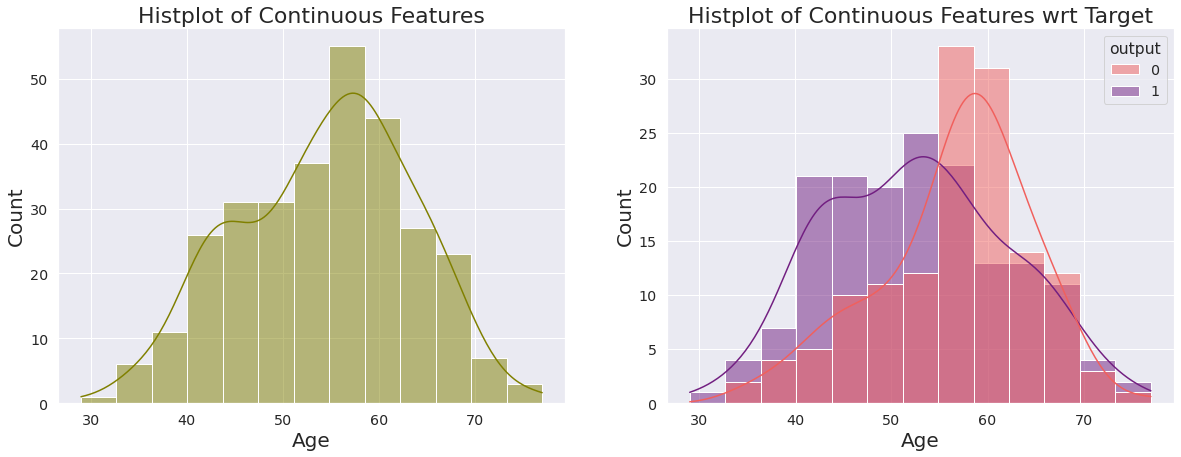

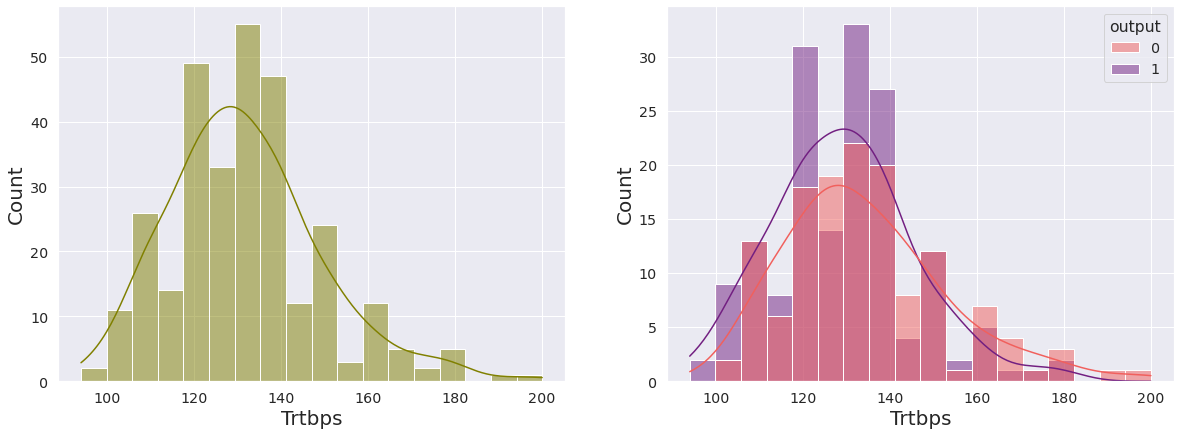

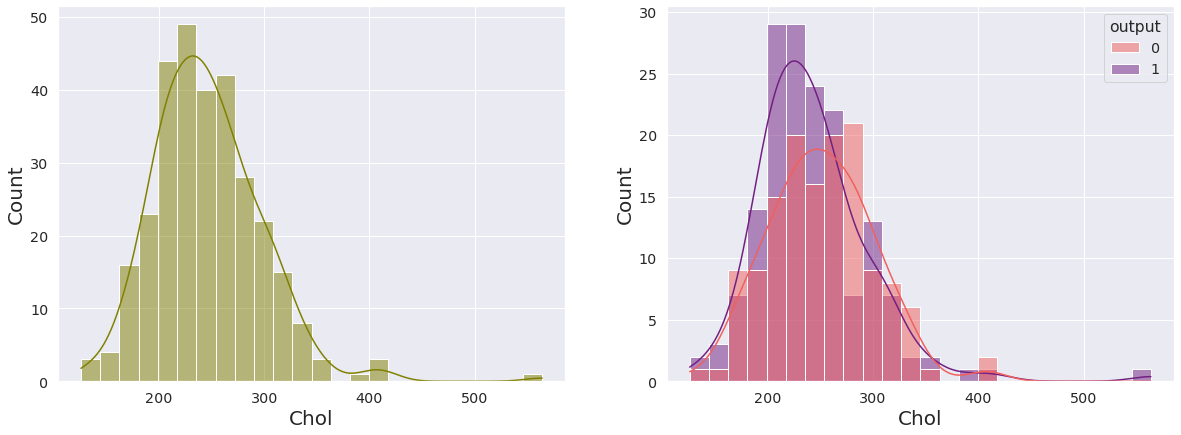

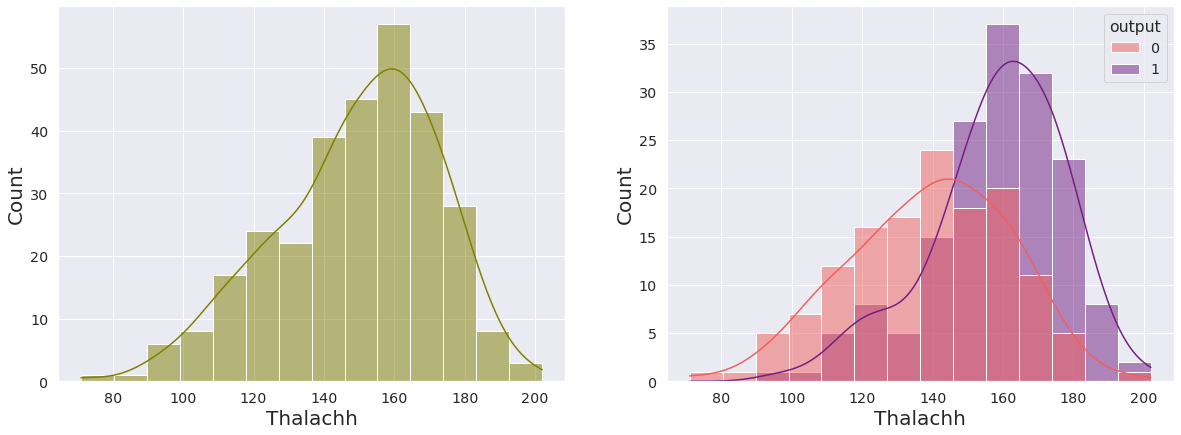

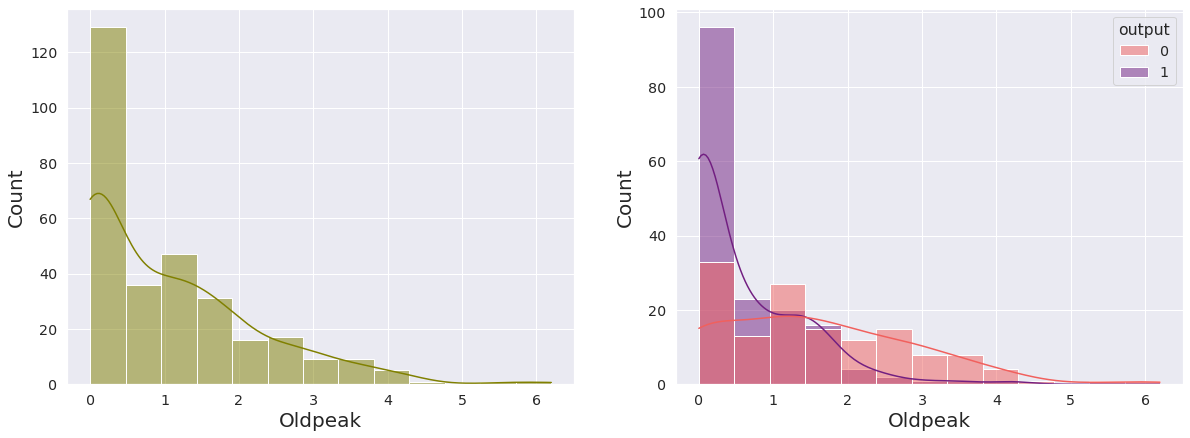

In [15]:
cont = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


for i in range(len(cont)):
    
    plt.figure(figsize=(20,40))
    
    plt.subplot(len(cont),2,1)
    sns.histplot(x=cont[i] , data=df, color='Olive', kde=True)
    plt.xlabel(cont[i].capitalize(), fontsize=20)
    plt.ylabel('Count', fontsize=20)
    if i == 0:
        plt.title('Histplot of Continuous Features', fontsize=22)
    
    plt.subplot(len(cont),2,2)
    sns.histplot(x=cont[i], hue='output', data = df, palette='magma_r', kde=True)
    plt.xlabel(cont[i].capitalize(), fontsize=20)
    plt.ylabel('Count', fontsize=20)
    if i == 0:
        plt.title('Histplot of Continuous Features wrt Target', fontsize=22)
    
    plt.show()

### **Pairplot of Continuous Features**

Plotting pairplots for Continuous features to see any significant correlation among the features.

In [16]:
# pair = df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']]


# ax = sns.pairplot(pair, hue='output', palette='rocket')
# ax._legend.remove()
# ax.fig.legend(title='Output', labels = ['Heart Attack', 'No Heart Attack'])
# ax.fig.subplots_adjust(right=0.8, top=1)

# plt.show()

#### Plotting Correlation Heatmap to find the correlation among columns

In [17]:
# plt.figure(figsize=(20,10))

# sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

# plt.show()

# **MACHINE LEARNING & PREDICTION**

### **Data Preparation**

**Converting the data to similar typecast**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 45.4 KB


In [19]:
df = df.astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trtbps    302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalachh  302 non-null    float64
 8   exng      302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    float64
 11  caa       302 non-null    float64
 12  thall     302 non-null    float64
 13  output    302 non-null    float64
dtypes: float64(14)
memory usage: 45.4 KB


In [21]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


**Performing Standardization (Normalizing the data)**

In [22]:
min_d = df.min()
max_d = df.max()
norm_df = (df - min_d) / (max_d - min_d)

In [23]:
norm_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [24]:
# denormalized_d = normalized_d * (max_d - min_d) + min_d

In [25]:
# denormalized_d.head()

In [26]:
# norm_df = (df - df.mean()) / df.std()

In [27]:
norm_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


**We cannot perform normalization to our target variable so replacing with the original one**

In [28]:
norm_df['output'] = df['output']

In [29]:
norm_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


**Shuffling the DataSet before splitting**

In [30]:
norm_df = norm_df.sample(frac=1, random_state=123)

**Splitting 75% of the data into training set and 25% into test set**

In [31]:
print(norm_df.shape)
print(302*0.75)

(302, 14)
226.5


In [32]:
train = norm_df[:226]
test = norm_df[226:]

**Determining the Correlation of Features wrt to the Target Feature**

In [33]:
abs(norm_df.corr()['output'])

age         0.221476
sex         0.283609
cp          0.432080
trtbps      0.146269
chol        0.081437
fbs         0.026826
restecg     0.134874
thalachh    0.419955
exng        0.435601
oldpeak     0.429146
slp         0.343940
caa         0.408992
thall       0.343101
output      1.000000
Name: output, dtype: float64

#### **Plotting Correlation Heatmap wrt to Output (Target Label)**

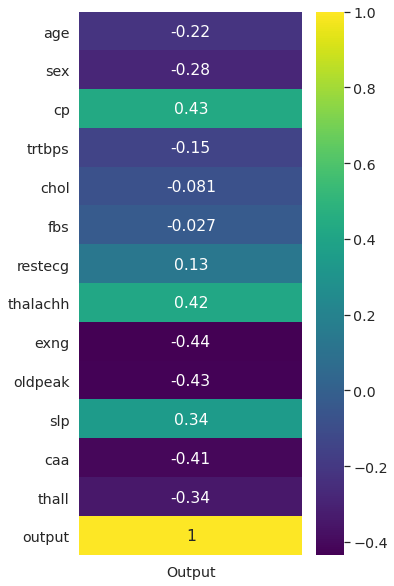

In [34]:
plt.figure(figsize=(5,10))

cor_df = pd.DataFrame({'Output' : norm_df.corr()['output'].values},
                     index = norm_df.corr()['output'].index)

sns.heatmap(cor_df, annot=True, cmap='viridis')

plt.show()

**We've to take the features having correlation with output > 0.25**

In [35]:
corr = abs(norm_df.corr()['output'])
corr[corr>0.25]

sex         0.283609
cp          0.432080
thalachh    0.419955
exng        0.435601
oldpeak     0.429146
slp         0.343940
caa         0.408992
thall       0.343101
output      1.000000
Name: output, dtype: float64

In [36]:
corr[corr>0.25].index

Index(['sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall',
       'output'],
      dtype='object')

In [37]:
features = ['sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
target = ['output']

In [38]:
norm_df[['sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]

,sex,cp,thalachh,exng,oldpeak,slp,caa,thall
11,0.0,0.666667,0.519084,0.0,0.032258,1.0,0.00,0.666667
292,0.0,0.000000,0.572519,1.0,0.451613,0.5,0.50,0.333333
269,1.0,0.000000,0.244275,1.0,0.258065,0.0,0.00,1.000000
268,1.0,0.000000,0.343511,1.0,0.516129,0.5,0.50,0.666667
94,0.0,0.333333,0.511450,0.0,0.000000,0.5,0.00,0.666667
...,...,...,...,...,...,...,...,...
106,1.0,1.000000,0.458015,0.0,0.016129,0.5,0.25,0.666667
83,1.0,1.000000,0.816794,0.0,0.193548,0.5,0.00,1.000000
17,0.0,1.000000,0.328244,0.0,0.419355,0.0,0.00,0.666667
231,1.0,0.000000,0.404580,0.0,0.161290,0.5,0.75,1.000000


### **Importing Necessary Libraries for ML**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### **Comparing Models with their Default Parameters**

In [40]:
model_KNN = KNeighborsClassifier()
model_RF = RandomForestClassifier()
model_GB = GradientBoostingClassifier()
model_LG = LogisticRegression()

model_RF.fit(train[features], train[target])
acc_RF = model_RF.score(test[features], test[target])

model_KNN.fit(train[features], train[target])
acc_KNN = model_KNN.score(test[features], test[target])

model_GB.fit(train[features], train[target])
acc_GB = model_GB.score(test[features], test[target])

model_LG.fit(train[features], train[target])
acc_LG = model_LG.score(test[features], test[target])

ind = ['Random Forest', 'Gradient Boost', 'K Nearest Neighbor', 'Logistic Regression']
pd.DataFrame({'Models': ind, 'Accuracy':[round(acc_RF,2), 
                                         round(acc_GB,2), 
                                         round(acc_KNN,2),
                                        round(acc_LG,2)],
              'Mean Sqaured Error' : [mean_squared_error(test['output'], model_RF.predict(test[features])),
                                      mean_squared_error(test['output'], model_GB.predict(test[features])),
                                      mean_squared_error(test['output'], model_KNN.predict(test[features])),
                                      mean_squared_error(test['output'], model_LG.predict(test[features]))
                  
              ] }).set_index('Models')

,Accuracy,Mean Sqaured Error
Models,,
Random Forest,0.80,0.197368
Gradient Boost,0.82,0.184211
K Nearest Neighbor,0.79,0.210526
Logistic Regression,0.86,0.144737


# **Hyperparamter Optimization** 

### **Random Forest Classifier**

**Estimating Optimum values for n_estimator and max_depth**

In [41]:
n_est = {}
for i in range(10,100):
    for k in range(1,25):
        model_RF = RandomForestClassifier(n_estimators=i, max_depth=k, criterion='entropy', random_state=123)
        model_RF.fit(train[features], train[target])
        pred = model_RF.predict(test[features])
        accuracy = model_RF.score(test[features], test[target])
        n_est[i, k] = round(accuracy*100,2)

In [42]:
print(f'(n_estimator, max_depth) @ max accuracy: {max(n_est , key = n_est.get)}')
print(f'Max Accuracy: {n_est[max(n_est , key = n_est.get)]}%')

(n_estimator, max_depth) @ max accuracy: (26, 2)
Max Accuracy: 89.47%


**It can be seen that with n_estimator=26 and max_depth=2, we will have maximum accuracy=89.47%.**

### **Plotting the parameters for Maximum Accuracy**

In [43]:
ls_a = []
ls_b = []
for i in n_est:
    ls_a.append(i[0])
    ls_b.append(i[1])  

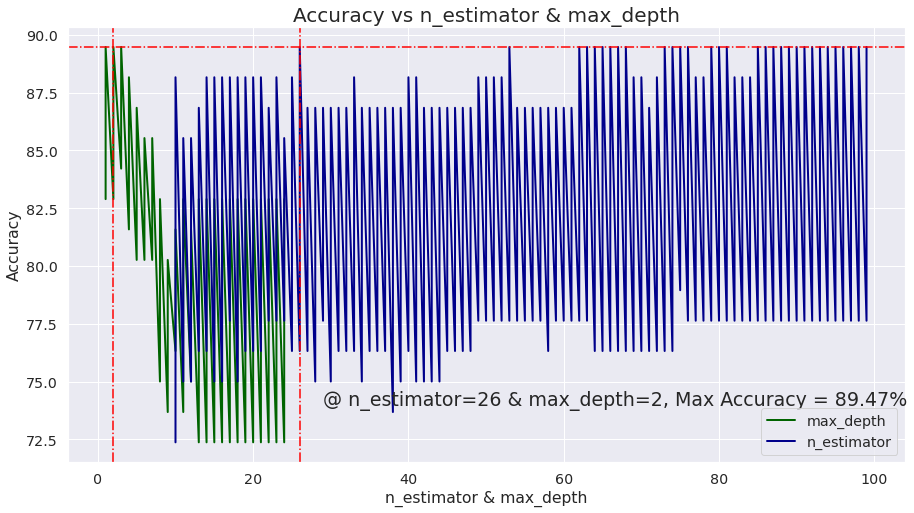

In [44]:
plt.figure(figsize=(15,8))

sns.lineplot(x = ls_b, y = list(n_est.values()), color = 'darkgreen', 
             lw=2, ci=0.1, estimator=None, label='max_depth')

sns.lineplot(x = ls_a, y = list(n_est.values()),
             color = 'darkblue', lw=2, ci=0.1, estimator=None, label='n_estimator')

plt.axhline(y = 89.47, linestyle='-.',color='red')
plt.axvline(x = 26, linestyle='-.',color='red')
plt.axvline(x = 2, linestyle='-.',color='red')




plt.text(x=29, y = 74, s='@ n_estimator=26 & max_depth=2, Max Accuracy = 89.47%', fontsize=19)
plt.title('Accuracy vs n_estimator & max_depth', fontsize=20)
plt.xlabel('n_estimator & max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

### **Gradient Boost Classifier**

#### *For n_estimators and max_depth*

In [45]:
gb = {}
for i in range(10,100):
    for k in range(1,25):
        model_GB = GradientBoostingClassifier(n_estimators=i, max_depth=k, random_state=123)
        model_GB.fit(train[features], train[target])
        pred = model_GB.predict(test[features])
        accuracy = model_GB.score(test[features], test[target])
        gb[i, k] = round(accuracy*100,2)

In [46]:
print(f'(n_estimator, max_depth) @ max accuracy: {max(gb , key = gb.get)}')
print(f'Max Accuracy: {gb[max(gb , key = gb.get)]}%')

(n_estimator, max_depth) @ max accuracy: (11, 1)
Max Accuracy: 90.79%


**It can be seen that with n_estimator=11 and max_depth=1, we will have maximum accuracy=90.79%.**

### **Plotting the parameters for Maximum Accuracy**

In [47]:
ls_a = []
ls_b = []
for i in gb:
    ls_a.append(i[0])
    ls_b.append(i[1])    

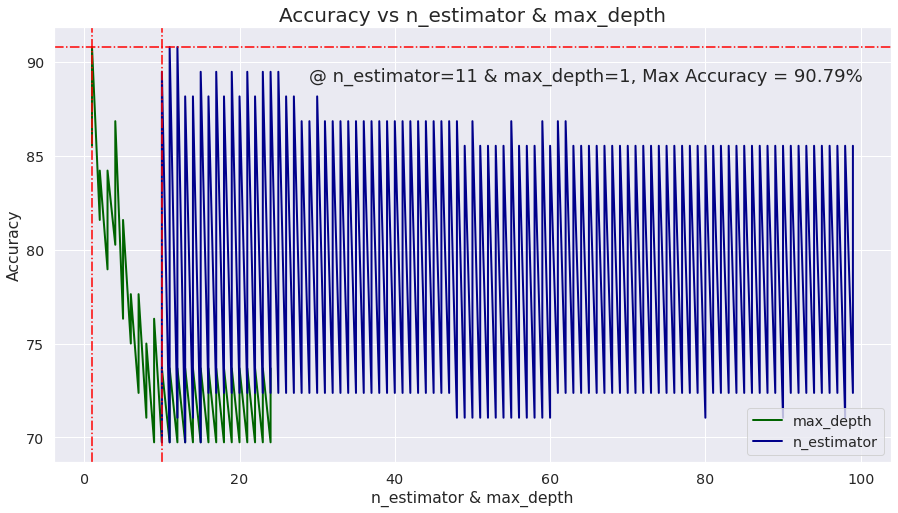

In [48]:



plt.figure(figsize=(15,8))

sns.lineplot(x = ls_b, y = list(gb.values()), color = 'darkgreen', 
             lw=2, ci=0.1, estimator=None, label='max_depth')

sns.lineplot(x = ls_a, y = list(gb.values()),
             color = 'darkblue', lw=2, ci=0.1, estimator=None, label='n_estimator')

plt.axhline(y = 90.79, linestyle='-.',color='red')
plt.axvline(x = 10, linestyle='-.',color='red')
plt.axvline(x = 1, linestyle='-.',color='red')




plt.text(x=29, y = 89, s='@ n_estimator=11 & max_depth=1, Max Accuracy = 90.79%', fontsize=18)
plt.title('Accuracy vs n_estimator & max_depth', fontsize=20)
plt.xlabel('n_estimator & max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### *For learninig_rate*

In [49]:
gb_lr = {}
for k in range(1,21):
    model_GB = GradientBoostingClassifier(n_estimators=11, max_depth=1, learning_rate= k/10,
                                                  random_state=123)
    model_GB.fit(train[features], train[target])
    pred = model_GB.predict(test[features])
    accuracy = model_GB.score(test[features], test[target])
    gb_lr[k/10] = round(accuracy*100,2)

In [50]:
print(f'learning_rate @ max accuracy: {max(gb_lr , key = gb_lr.get)}')
print(f'Max Accuracy: {gb_lr[max(gb_lr , key = gb_lr.get)]}%')

learning_rate @ max accuracy: 0.1
Max Accuracy: 90.79%


**At learning_rate = 0.1, we will have maximum accuracy=90.79%.**

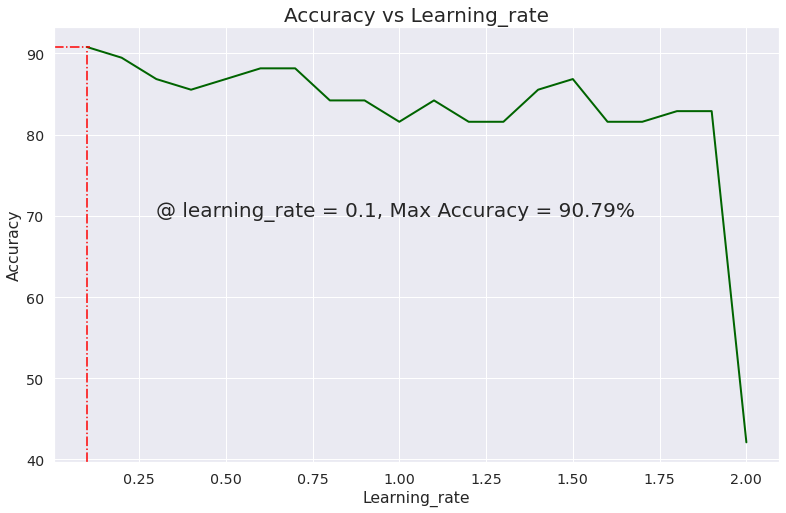

In [51]:
plt.figure(figsize=(13,8))

sns.lineplot(x = list(gb_lr.keys()), y = list(gb_lr.values()),
            color = 'darkgreen', lw=2)
plt.axhline(y = 90.79, linestyle='-.',color='red', xmax=0.05)
plt.axvline(x = 0.1, linestyle='-.',color='red', ymax=0.95 )
plt.text(x=0.3, y = 70, s='@ learning_rate = 0.1, Max Accuracy = 90.79%', fontsize=20)
plt.title('Accuracy vs Learning_rate', fontsize=20)
plt.xlabel('Learning_rate')
plt.ylabel('Accuracy')

plt.show()

### **KNearest Neighbors Classifier**

In [52]:
knn = {}
for k in range(1,100):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(train[features], train[target])
    pred = model_KNN.predict(test[features])
    accuracy = model_KNN.score(test[features], test[target])
    knn[k] = round(accuracy*100,2)

In [53]:
print(f'n_neighbor at max accuracy: {max(knn, key = knn.get)}')
print(f'Max Accuracy: {knn[18]}%')

n_neighbor at max accuracy: 3
Max Accuracy: 77.63%


**At n_neighbors = 18, we can achieve maximum accuracy=88.16%. Same is also shown in the plot below**

### **Plotting n_neighbors for Max Accuracy**

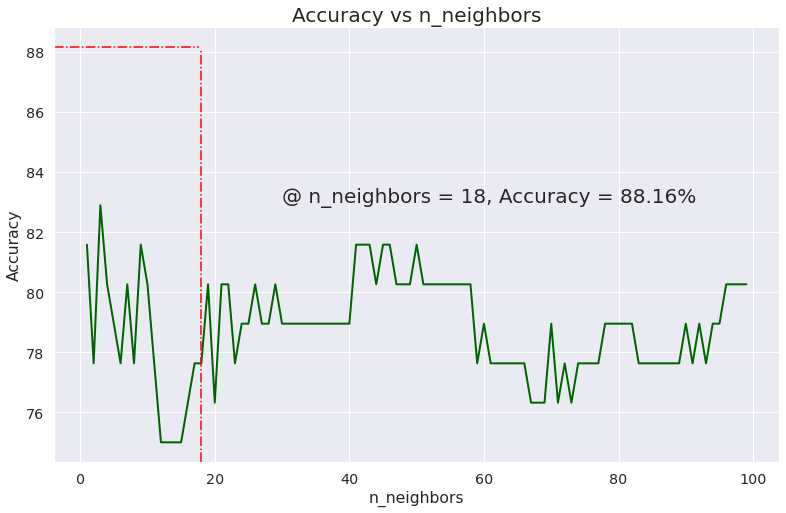

In [54]:
plt.figure(figsize=(13,8))

sns.lineplot(x = list(knn.keys()), y = list(knn.values()),
            color = 'darkgreen', lw=2)
plt.axhline(y = 88.16, linestyle='-.',color='red', xmax=0.20)
plt.axvline(x = 18, linestyle='-.',color='red', ymax=0.95 )
plt.text(x=30, y = 83, s='@ n_neighbors = 18, Accuracy = 88.16%', fontsize=20)
plt.title('Accuracy vs n_neighbors', fontsize=20)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

plt.show()

### **Logistic Regression**

In [55]:
lg = {}
for i in range(1,200):
    model_LR = LogisticRegression(max_iter=i)
    model_LR.fit(train[features], train[target])
    pred = model_LR.predict(test[features])
    accuracy = model_LR.score(test[features], test[target])
    lg[i] = round(accuracy*100,2)

In [56]:
print(f'max_iteration at max accuracy: {max(lg, key = lg.get)}')
print(f'Max Accuracy: {lg[max(lg, key = lg.get)]}%')

max_iteration at max accuracy: 10
Max Accuracy: 86.84%


**At maximum iterations=2, we will have maximum accuracy=88.16% for Logistic Regression**

### **Plotting Accuracy vs max_iterations**

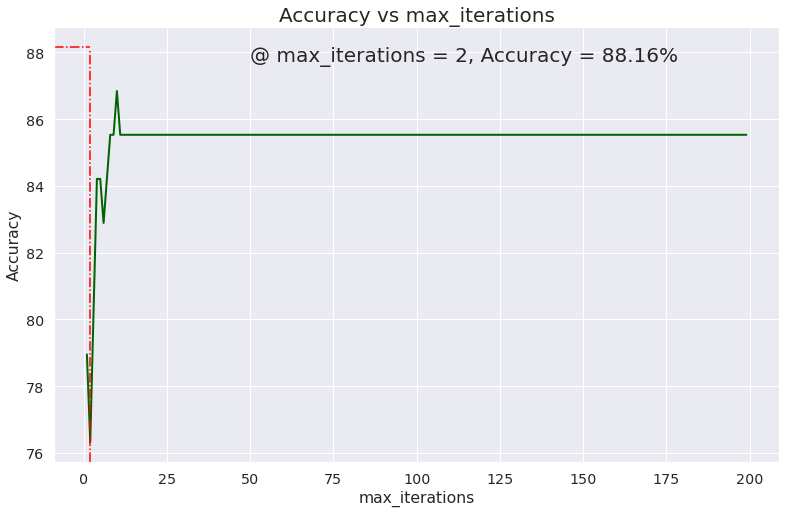

In [57]:
plt.figure(figsize=(13,8))

sns.lineplot(x = list(lg.keys()), y = list(lg.values()),
            color = 'darkgreen', lw=2)
plt.axhline(y = 88.16, linestyle='-.',color='red', xmax=0.05)
plt.axvline(x = 2, linestyle='-.',color='red', ymax=0.95 )
plt.text(x=50, y = 87.75, s='@ max_iterations = 2, Accuracy = 88.16%', fontsize=20)
plt.title('Accuracy vs max_iterations', fontsize=20)
plt.xlabel('max_iterations')
plt.ylabel('Accuracy')

plt.show()

## **Models Comparison after Tuning**

The parameters optimizations performed above is very necessay, as it brings you to choose the optimim values for your variables, further it also helps to minimize the computation time as well in some cases.

So after performing parameters optimization as shown above, it can be concluded that:
- K Nearest Neighbors will give its maximum accuracy for this dataset when n_neighbors = 18.
- Random Forest will give its maximum accuracy for this dataset, when n_estimators=26 & max_depth=2.
- Gradient Boost will give its maximum accuracy for this dataset, when n_estimators=11, max_depth=1 & learning_rate=0.1.
- Logistic Regression will give its maximum accuracy for this dataset, when max_iteration=2.

In [58]:
model_KNN = KNeighborsClassifier(n_neighbors= 18)
model_RF = RandomForestClassifier(n_estimators=26, max_depth=2, random_state=1, criterion='entropy')
model_GB = GradientBoostingClassifier(n_estimators=11, learning_rate=0.1,max_depth=1, random_state=1)
model_LG = LogisticRegression(max_iter=2)


model_RF.fit(train[features], train[target])
acc_RF = model_RF.score(test[features], test[target])

model_KNN.fit(train[features], train[target])
acc_KNN = model_KNN.score(test[features], test[target])

model_GB.fit(train[features], train[target])
acc_GB = model_GB.score(test[features], test[target])

model_LG.fit(train[features], train[target])
acc_LG = model_LG.score(test[features], test[target])

ind = ['Random Forest', 'Gradient Boost', 'K Nearest Neighbor', 'Logistic Regression']
pd.DataFrame({'Models': ind, 'Accuracy':[round(acc_RF,2), 
                                         round(acc_GB,2), 
                                         round(acc_KNN,2),
                                        round(acc_LG,2)],
              'Mean Sqaured Error' : [mean_squared_error(test['output'], model_RF.predict(test[features])),
                                      mean_squared_error(test['output'], model_GB.predict(test[features])),
                                      mean_squared_error(test['output'], model_KNN.predict(test[features])),
                                      mean_squared_error(test['output'], model_LG.predict(test[features]))
                  
              ] }).set_index('Models')

,Accuracy,Mean Sqaured Error
Models,,
Random Forest,0.89,0.105263
Gradient Boost,0.91,0.092105
K Nearest Neighbor,0.78,0.223684
Logistic Regression,0.76,0.236842


### **As we can see that our Gradient Boost works best on our data set showing Maximum Accuracy of 91% and Mean Squared Error = 0.092**

In [59]:
prediction = model_GB.predict(test[features])

In [60]:
test['Prediction'] = prediction

#### **True Values vs Predicted Values**

In [61]:
test[['output', 'Prediction']]

,output,Prediction
240,0.0,0.0
302,0.0,1.0
103,1.0,1.0
218,0.0,0.0
149,1.0,1.0
...,...,...
106,1.0,1.0
83,1.0,1.0
17,1.0,1.0
231,0.0,0.0


In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
cm = confusion_matrix(test['output'],test['Prediction'])

In [64]:
(test['Prediction'] == 0).sum()

31

In [65]:
cm

array([[28,  4],
       [ 3, 41]])

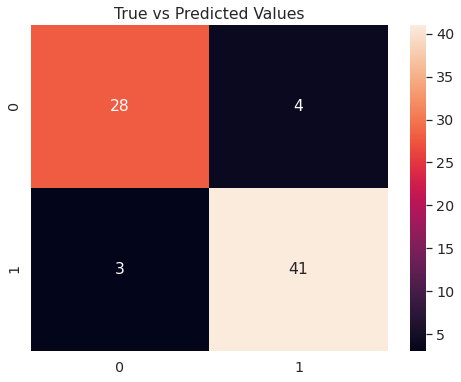

In [66]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)

plt.title('True vs Predicted Values')

plt.show()

#### **If you find this notebook helpful, kindly upvote. If you have any query related to this notebook, do comment below, it will be my pleasure to answer them.**
### **Thank You**

In [101]:
import pickle

In [102]:
pickle_out = open('model_GB.pkl', "wb")
pickle.dump(model_GB, pickle_out)
pickle_out.close()

In [75]:
norm_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
11,0.395833,0.0,0.666667,0.339623,0.340183,0.0,0.5,0.519084,0.0,0.032258,1.0,0.0,0.666667,1.0
292,0.604167,0.0,0.000000,0.716981,0.226027,1.0,0.0,0.572519,1.0,0.451613,0.5,0.5,0.333333,0.0
269,0.562500,1.0,0.000000,0.339623,0.358447,1.0,0.0,0.244275,1.0,0.258065,0.0,0.0,1.000000,0.0
268,0.520833,1.0,0.000000,0.264151,0.365297,0.0,0.0,0.343511,1.0,0.516129,0.5,0.5,0.666667,0.0
94,0.333333,0.0,0.333333,0.169811,0.077626,0.0,0.5,0.511450,0.0,0.000000,0.5,0.0,0.666667,1.0


In [74]:
norm_df[['sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].head()

,sex,cp,thalachh,exng,oldpeak,slp,caa,thall
11,0.0,0.666667,0.519084,0.0,0.032258,1.0,0.0,0.666667
292,0.0,0.000000,0.572519,1.0,0.451613,0.5,0.5,0.333333
269,1.0,0.000000,0.244275,1.0,0.258065,0.0,0.0,1.000000
268,1.0,0.000000,0.343511,1.0,0.516129,0.5,0.5,0.666667
94,0.0,0.333333,0.511450,0.0,0.000000,0.5,0.0,0.666667


In [70]:
# age	sex	cp	trtbps	chol	fbs	restecg	thalachh	exng	oldpeak	slp	caa	thall	output
# 63.0	1.0	3.0	145.0	233.0	1.0	0.0	150.0	0.0	2.3	0.0	0.0	1.0	1.0

In [ ]:
# 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'

In [81]:
sex_min = df['sex'].min()
cp_min = df['cp'].min()
thalachh_min = df['thalachh'].min()
exng_min = df['exng'].min()
oldpeak_min = df['oldpeak'].min()
slp_min = df['slp'].min()
caa_min = df['caa'].min()
thall_min = df['thall'].min()

sex_max = df['sex'].max()
cp_max = df['cp'].max()
thalachh_max = df['thalachh'].max()
exng_max = df['exng'].max()
oldpeak_max = df['oldpeak'].max()
slp_max = df['slp'].max()
caa_max = df['caa'].max()
thall_max = df['thall'].max()

In [84]:
def sex(x):
    return (x- sex_min) / (sex_max - sex_min)
def cp(x):
    return (x- cp_min) / (cp_max - cp_min)
def thalachh(x):
    return (x- thalachh_min) / (thalachh_max - thalachh_min)
def exng(x):
    return (x- exng_min) / (exng_max - exng_min)
def oldpeak(x):
    return (x- oldpeak_min) / (oldpeak_max - oldpeak_min)
def slp(x):
    return (x- slp_min) / (slp_max - slp_min)
def caa(x):
    return (x- caa_min) / (caa_max - caa_min)
def thall(x):
    return (x- thall_min) / (thall_max - thall_min)

In [97]:
df.iloc[11:15]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
11,48.0,0.0,2.0,130.0,275.0,0.0,1.0,139.0,0.0,0.2,2.0,0.0,2.0,1.0
12,49.0,1.0,1.0,130.0,266.0,0.0,1.0,171.0,0.0,0.6,2.0,0.0,2.0,1.0
13,64.0,1.0,3.0,110.0,211.0,0.0,0.0,144.0,1.0,1.8,1.0,0.0,2.0,1.0
14,58.0,0.0,3.0,150.0,283.0,1.0,0.0,162.0,0.0,1.0,2.0,0.0,2.0,1.0


In [96]:
norm_df[['sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].head()

,sex,cp,thalachh,exng,oldpeak,slp,caa,thall
11,0.0,0.666667,0.519084,0.0,0.032258,1.0,0.0,0.666667
292,0.0,0.000000,0.572519,1.0,0.451613,0.5,0.5,0.333333
269,1.0,0.000000,0.244275,1.0,0.258065,0.0,0.0,1.000000
268,1.0,0.000000,0.343511,1.0,0.516129,0.5,0.5,0.666667
94,0.0,0.333333,0.511450,0.0,0.000000,0.5,0.0,0.666667


0.5190839694656488

In [151]:
prediction = model_GB.predict([[0.0,0.666667,0.519084,0.0,0.032258,1.0,0.0,0.666667]])

In [153]:
round(prediction[0],2)

1.0

In [141]:
df['thalachh'].value_counts()

162.0    11
163.0     9
160.0     9
152.0     8
150.0     7
         ..
129.0     1
184.0     1
185.0     1
190.0     1
90.0      1
Name: thalachh, Length: 91, dtype: int64

In [142]:
norm_df['thalachh'].value_counts()

0.694656    11
0.679389     9
0.702290     9
0.618321     8
0.549618     7
            ..
0.480916     1
0.351145     1
0.442748     1
0.908397     1
1.000000     1
Name: thalachh, Length: 91, dtype: int64

In [147]:
(162.0-71.0)/(202.0-71.0)

0.6946564885496184

In [148]:
oldpeak_min

0.0

In [149]:
oldpeak_max

6.2